In [90]:
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning

from sklearn.ensemble import RandomForestClassifier


In [91]:
 movie = pd.read_csv('movies.dat', sep='::', encoding='iso-8859-1')
 movie.columns =['MovieIDs','MovieName','Category']
 movie.dropna(inplace=True)
 movie.head()


<ipython-input-91-e1d4de8aa90b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie = pd.read_csv('movies.dat', sep='::', encoding='iso-8859-1')


,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [92]:
rating = pd.read_csv('ratings.dat', sep='::', encoding='iso-8859-1')
rating.columns =['ID','MovieID','Ratings','TimeStamp']
rating.dropna(inplace=True)
rating.head()

<ipython-input-92-a750cefe1841>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating = pd.read_csv('ratings.dat', sep='::', encoding='iso-8859-1')


,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [93]:
#Data acquisition of the users dataset
user = pd.read_csv("users.dat",sep='::',encoding='iso-8859-1')
user.columns =['UserID','Gender','Age','Occupation','Zip-code']
user.dropna(inplace=True)
user.head()

<ipython-input-93-5997ff110fac>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  user = pd.read_csv("users.dat",sep='::',encoding='iso-8859-1')


,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [94]:
movie.isna().sum()

MovieIDs     0
MovieName    0
Category     0
dtype: int64

In [95]:
user.isna().sum()


UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [96]:
rating.isna().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
user["Gender"]= labelencoder.fit_transform(user['Gender'])
user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [99]:
user.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [100]:
merge_data = pd.concat([ movie, rating, user], axis=1)
merge_data.head(20)

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,0.0,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,0.0,25.0,1.0,04093


In [101]:
merge_data.shape

(1000208, 12)

In [102]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieIDs    3882 non-null     float64
 1   MovieName   3882 non-null     object 
 2   Category    3882 non-null     object 
 3   ID          1000208 non-null  int64  
 4   MovieID     1000208 non-null  int64  
 5   Ratings     1000208 non-null  int64  
 6   TimeStamp   1000208 non-null  int64  
 7   UserID      6039 non-null     float64
 8   Gender      6039 non-null     float64
 9   Age         6039 non-null     float64
 10  Occupation  6039 non-null     float64
 11  Zip-code    6039 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 91.6+ MB


In [104]:
droped_data= merge_data.drop(["Occupation", "Zip-code", "TimeStamp"],axis=1)
droped_data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [105]:
droped_data.isna().sum()

MovieIDs     996326
MovieName    996326
Category     996326
ID                0
MovieID           0
Ratings           0
UserID       994169
Gender       994169
Age          994169
dtype: int64

In [106]:
datafinal=  droped_data.dropna()


In [107]:
datafinal.shape

(3882, 9)

<Axes: xlabel='Gender', ylabel='count'>

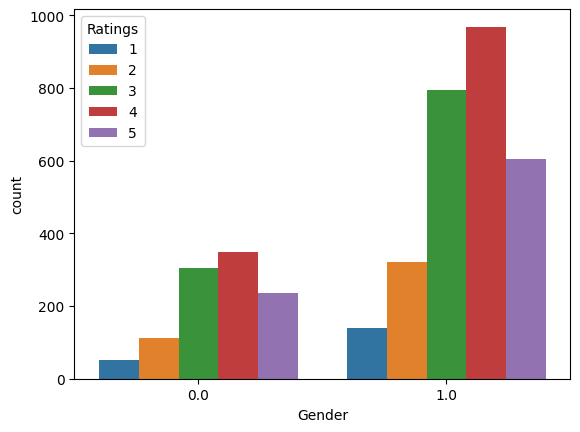

In [111]:
import seaborn as sns
sns.countplot(x=datafinal['Gender'], hue=datafinal['Ratings'])

Text(0.5, 0, 'Ratings')

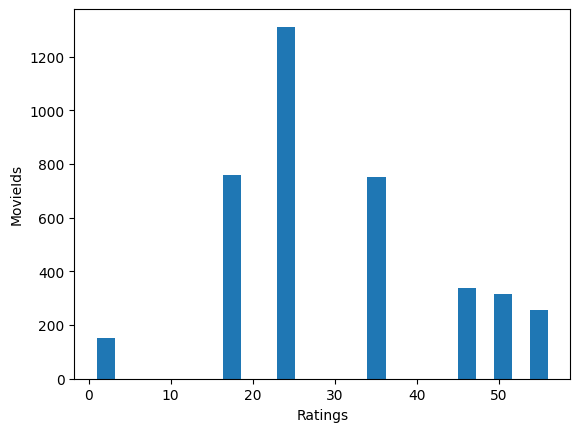

In [112]:
datafinal.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")

<Axes: ylabel='Frequency'>

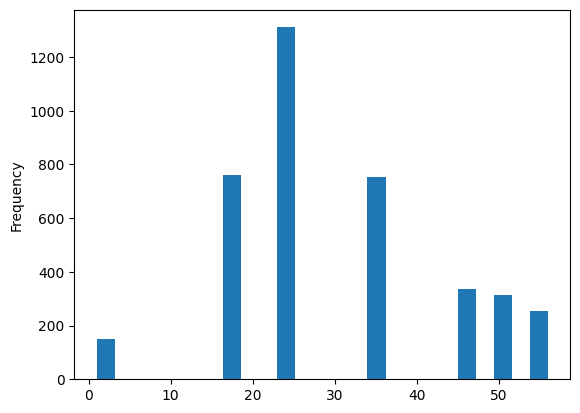

In [114]:
 datafinal['Age'].plot.hist(bins=25)

<Axes: xlabel='Age', ylabel='count'>

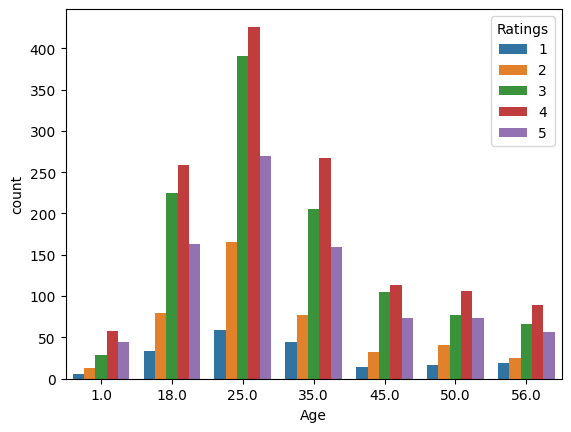

In [115]:
sns.countplot(x=datafinal['Age'],hue=datafinal['Ratings'])

In [116]:
datafinal.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [121]:
input=datafinal.drop(['Ratings', 'MovieName', 'Category', 'MovieIDs'], axis=1)
target=datafinal["Ratings"]

In [122]:
target.head()

0    3
1    3
2    4
3    5
4    3
Name: Ratings, dtype: int64

In [123]:
input.head()

,ID,MovieID,UserID,Gender,Age
0,1,661,2.0,1.0,56.0
1,1,914,3.0,1.0,25.0
2,1,3408,4.0,1.0,45.0
3,1,2355,5.0,1.0,25.0
4,1,1197,6.0,0.0,50.0


In [125]:
from sklearn.preprocessing import MinMaxScaler


In [129]:
scaler=MinMaxScaler()
scaleddata= scaler.fit_transform(input)
scaleddf = pd.DataFrame(scaleddata,columns=input.columns)
scaleddf.head()

,ID,MovieID,UserID,Gender,Age
0,0.0,0.167046,0.000000,1.0,1.000000
1,0.0,0.231081,0.000258,1.0,0.436364
2,0.0,0.862313,0.000515,1.0,0.800000
3,0.0,0.595799,0.000773,1.0,0.436364
4,0.0,0.302708,0.001031,0.0,0.890909


In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test=train_test_split(input, target, test_size=0.3)

In [131]:
 Y_train

2513    5
1985    4
850     5
2949    5
1195    4
       ..
3767    2
2270    4
416     5
3607    3
233     3
Name: Ratings, Length: 2717, dtype: int64

In [132]:
Y_test

3448    3
3730    3
1030    4
628     4
1918    4
       ..
2732    3
12      4
169     4
2305    3
1560    4
Name: Ratings, Length: 1165, dtype: int64

In [134]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
xtest=np.array(x_test)

In [136]:
modell =model.predict(x_test)

In [137]:
modell

array([4, 3, 4, ..., 4, 4, 4])

In [138]:
Y_test

3448    3
3730    3
1030    4
628     4
1918    4
       ..
2732    3
12      4
169     4
2305    3
1560    4
Name: Ratings, Length: 1165, dtype: int64